# Spatiotemporal Cluster Overlay (STCO)

Luke Zaruba, Bryan Runck

January 22, 2024

<br>

*Abstract here...*

In [1]:
# Imports
import contextily as ctx
import geopandas as gpd
from matplotlib import pyplot as plt
from stco.clustering import TemporalADBSCAN
from stco.overlay import simple_overlay, stcec, weighted_overlay

/Users/lukezaruba/miniconda3/envs/mnaccidents-env/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Users/lukezaruba/miniconda3/envs/mnaccidents-env/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Users/

## Data

In [3]:
# Load data
incidents_gdf = gpd.read_file("../data/inputs/INCIDENTS.geojson")
ctu_gdf = gpd.read_file("../data/inputs/CTU.geojson")

### STCO: Simple

In [4]:
# Create ADBSCAN Clusters per Year
tadbs = TemporalADBSCAN(
    data=incidents_gdf,
    period="Y",
    eps=0.15,
    min_sample_pct=0.01,
    time_field="incident_date",
    pct_exact=0.5,
    reps=50,
    keep_solus=True,
)

tadbs_clusters = tadbs.fit_all()

tadbs_clusters.head()

100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


,PERIOD,geometry
0,2020,"POLYGON ((-94.97406 45.88946, -94.87256 45.875..."
10,2020,"POLYGON ((-93.95235 44.32971, -93.95922 44.264..."
13,2020,"POLYGON ((-94.37573 44.83054, -94.39616 44.863..."
19,2020,"POLYGON ((-94.94302 45.27555, -94.94273 45.263..."
2,2020,"POLYGON ((-93.79177 45.04196, -93.91024 45.021..."


In [5]:
# Simple Overlay
stco_so = simple_overlay(tadbs_clusters.copy())

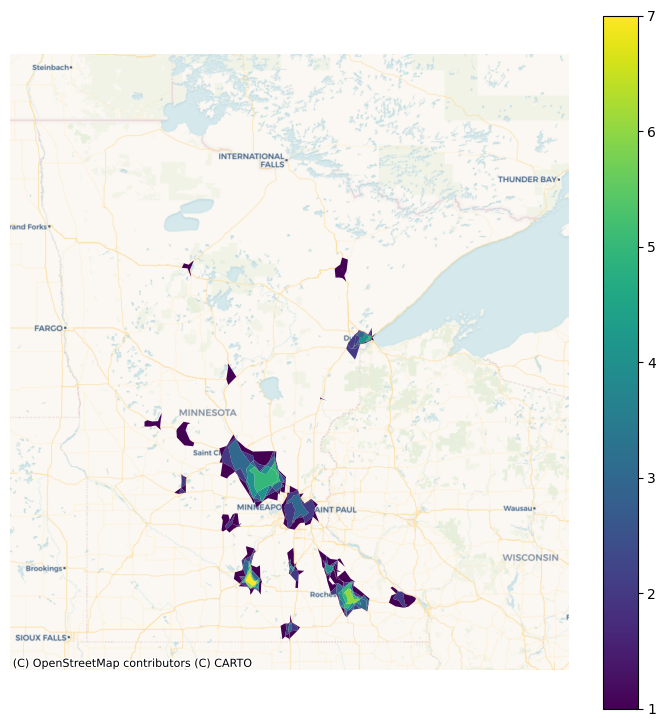

In [6]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

stco_so = stco_so.set_crs(epsg=4326)
stco_so.to_crs(epsg=3857).plot(column="COUNT", legend=True, ax=ax)
ctu_gdf.to_crs(epsg=3857).plot(alpha=0, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### STCO: Weighted

In [7]:
# Weighted Overlay
stco_wo = weighted_overlay(tadbs_clusters.copy())

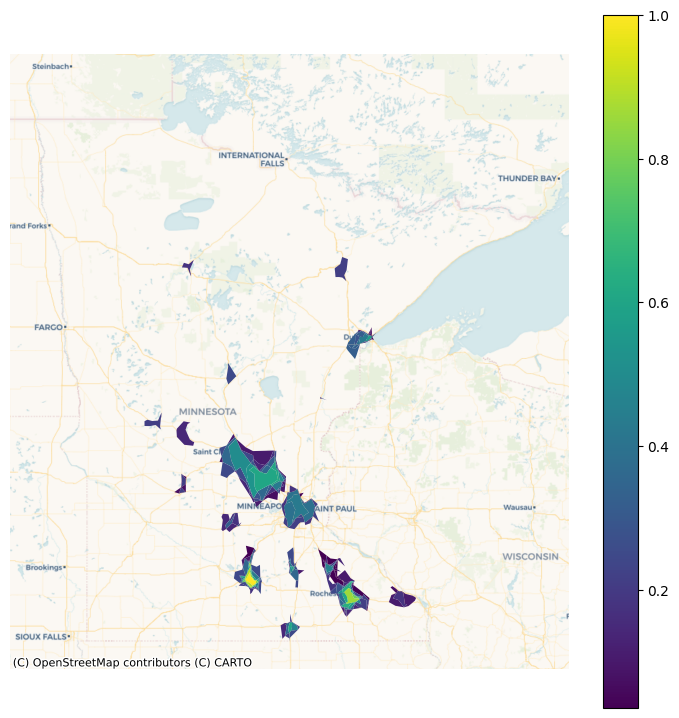

In [8]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

stco_wo = stco_wo.set_crs(epsg=4326)
stco_wo.to_crs(epsg=3857).plot(column="WEIGHT", legend=True, ax=ax)
ctu_gdf.to_crs(epsg=3857).plot(alpha=0, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### STCEC

In [9]:
# STCEC
stcec_classes = stcec(tadbs_clusters.copy(), significance_percent=0.8)

KeyError: 53 not found
KeyError: 56 not found
KeyError: 209 not found
KeyError: 212 not found


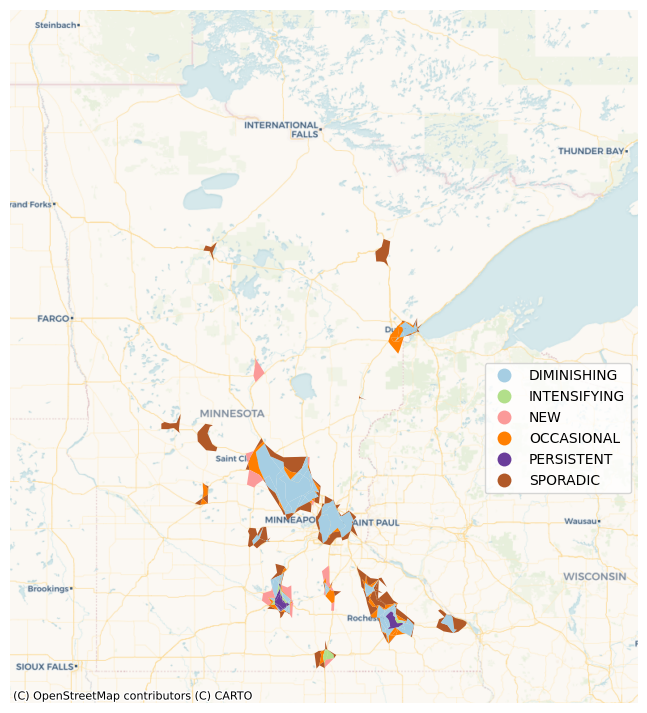

In [10]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

stcec_classes = stcec_classes.set_crs(epsg=4326)
stcec_classes.to_crs(epsg=3857).plot(
    column="STCEC",
    cmap="Paired",
    legend=True,
    ax=ax,
    legend_kwds={"bbox_to_anchor": (1, 0.5)},
)
ctu_gdf.to_crs(epsg=3857).plot(alpha=0, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()